Importação de Bibliotecas

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
dados_clinicos = pd.read_csv('../pesquisa de saúde/datasets/dados_clinicos.csv', sep='|')
dados_pacientes = pd.read_csv('../pesquisa de saúde/datasets/dados_pacientes.csv', sep=';')
dados_estados = pd.read_csv('../pesquisa de saúde/datasets/estado_regiao.csv', sep=';',
                            encoding='latin1')

In [13]:
dados_estados.head()

,id_estado,sigla,estado,regiao,pais
0,1,AC,Acre,Norte,Brasil
1,2,AL,Alagoas,Nordeste,Brasil
2,3,AP,Amapá,Norte,Brasil
3,4,AM,Amazonas,Norte,Brasil
4,5,BA,Bahia,Nordeste,Brasil


Avaliação de Dados Duplicados

In [14]:
dd_clinicos = dados_clinicos.duplicated().sum()
dd_pacientes = dados_pacientes.duplicated().sum()
dd_estados = dados_estados.duplicated().sum()

In [20]:
print(f'''Existem {dd_clinicos} dados duplicados no dataframe dados_clinicos.
Existem {dd_pacientes} dados duplicados no dataframe dados_pacientes.
Existem {dd_estados} dados duplicados no dataframe dados_clinicos.''')

Existem        id_cliente   peso  colesterol     genero
0               1  152.7       203.9  Masculino
1               2  184.8       233.8  Masculino
2               3  152.1       210.4  Masculino
3               4  139.8       196.8  Masculino
4               5  182.4       215.8   Feminino
...           ...    ...         ...        ...
10296        9996   54.4       132.0   Feminino
10297        9997   53.6       113.4   Feminino
10298        9998  104.2       166.0   Feminino
10299        9999   73.7       151.6   Feminino
10300       10000  189.0       238.6  Masculino

[10000 rows x 4 columns] dados duplicados no dataframe dados_clinicos.
Existem       id_cliente  idade            classe_trabalho             escolaridade  \
0              1     39           Servidor Público    Ensino Médio Completo   
1              2     50                   Autônomo      Superior Incompleto   
2              3     38  Funcionário Setor Privado  Ensino Médio Incompleto   
3              4    

Correção dos Dados Duplicados

In [18]:
dados_clinicos = dados_clinicos.drop_duplicates()
dados_pacientes = dados_pacientes.drop_duplicates()
dados_estados = dados_estados.drop_duplicates()

In [21]:
dd_clinicos = dados_clinicos.duplicated().sum()
dd_pacientes = dados_pacientes.duplicated().sum()
dd_estados = dados_estados.duplicated().sum()

In [22]:
print(f'''Existem {dd_clinicos} dados duplicados no dataframe dados_clinicos.
Existem {dd_pacientes} dados duplicados no dataframe dados_pacientes.
Existem {dd_estados} dados duplicados no dataframe dados_clinicos.''')

Existem 0 dados duplicados no dataframe dados_clinicos.
Existem 0 dados duplicados no dataframe dados_pacientes.
Existem 0 dados duplicados no dataframe dados_clinicos.


Analisando Dados Ausentes

In [30]:
def verifica_dados_ausentes(nome_dataframe, dataframe):
    dados_ausentes = dataframe.isna().sum()
    colunas_com_ausentes = dados_ausentes[dados_ausentes > 0]
    print('--' * 50)
    if not colunas_com_ausentes.empty:
        print(f'O dataframe {nome_dataframe} possui dados ausentes.\nLista de colunas:')
        return print(colunas_com_ausentes)
    else:
        print(f'O dataframe {nome_dataframe} não possui dados ausentes.')

In [31]:
verifica_dados_ausentes('Dados Clinicos', dataframe=dados_clinicos)
verifica_dados_ausentes('Dados Pacientes', dataframe=dados_pacientes)
verifica_dados_ausentes('Dados Estados', dataframe=dados_estados)

----------------------------------------------------------------------------------------------------
O dataframe Dados Clinicos possui dados ausentes.
Lista de colunas:
peso      13
genero    10
dtype: int64
----------------------------------------------------------------------------------------------------
O dataframe Dados Pacientes possui dados ausentes.
Lista de colunas:
classe_trabalho    387
qtde_filhos         10
dtype: int64
----------------------------------------------------------------------------------------------------
O dataframe Dados Estados não possui dados ausentes.


Corrigindo Dados Ausentes
1. Mediana para variáveis numéricas
2. Moda para as variáveis categóricas

In [33]:
filtro = dados_clinicos['peso'].isna()
index_ausentes_peso = dados_clinicos[filtro].index
dados_clinicos.loc[index_ausentes_peso].head()

,id_cliente,peso,colesterol,genero
10224,9924,NaN,201.1,Feminino
10225,9925,NaN,225.2,Masculino
10230,9930,NaN,134.9,Feminino
10231,9931,NaN,237.5,Feminino
10243,9943,NaN,219.3,Feminino


Correção dos dados de Peso

In [34]:
mediana = dados_clinicos['peso'].median()
print(f'A mediana dos pessoas das pessoas é {mediana}.')
dados_clinicos['peso'] = dados_clinicos['peso'].fillna(value=mediana)

A mediana dos pessoas das pessoas é 124.6.


C:\Users\renan\AppData\Local\Temp\ipykernel_20700\3423269563.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_clinicos['peso'] = dados_clinicos['peso'].fillna(value=mediana)


Analisando dados após a correção

In [35]:
dados_clinicos.loc[index_ausentes_peso].head()

,id_cliente,peso,colesterol,genero
10224,9924,124.6,201.1,Feminino
10225,9925,124.6,225.2,Masculino
10230,9930,124.6,134.9,Feminino
10231,9931,124.6,237.5,Feminino
10243,9943,124.6,219.3,Feminino


Analisando dados antes da correção: Gênero

In [36]:
filtro = dados_clinicos['genero'].isna()
index_ausentes_genero = dados_clinicos[filtro].index
dados_clinicos.loc[index_ausentes_genero].head()

,id_cliente,peso,colesterol,genero
10227,9927,177.6,220.3,NaN
10228,9928,149.3,199.3,NaN
10233,9933,65.3,132.8,NaN
10234,9934,180.6,214.1,NaN
10237,9937,103.6,160.8,NaN


In [43]:
moda = dados_clinicos['genero'].mode()[0]
print(f'A moda do gênero das pessoas é {moda}.')
dados_clinicos['genero'] = dados_clinicos['genero'].fillna(value=moda)

A moda do gênero das pessoas é Feminino.


C:\Users\renan\AppData\Local\Temp\ipykernel_20700\3833047026.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_clinicos['genero'] = dados_clinicos['genero'].fillna(value=moda)


Analisando dados após a correção

In [44]:
dados_clinicos.loc[index_ausentes_genero].head()

,id_cliente,peso,colesterol,genero
10227,9927,Feminino,220.3,Feminino
10228,9928,Feminino,199.3,Feminino
10233,9933,Feminino,132.8,Feminino
10234,9934,Feminino,214.1,Feminino
10237,9937,Feminino,160.8,Feminino


Analisando dados antes da correção: Classe de trabalho

In [46]:
filtro = dados_pacientes['classe_trabalho'].isna()
index_ausentes_classe_trabalho = dados_pacientes[filtro].index
dados_pacientes.loc[index_ausentes_classe_trabalho].head()

,id_cliente,idade,classe_trabalho,escolaridade,id_estado,estado_civil,raca,qtde_filhos,salario
61,62,32,NaN,Ensino Fundamental Incompleto,12,União Estável,Branco,4.0,1100
69,70,25,NaN,Ensino Médio Completo,1,Solteiro,Branco,3.0,3450
127,128,35,NaN,Ensino Médio Incompleto,1,Casado,Amarelo,4.0,1100
148,149,43,NaN,Ensino Médio Completo,21,Divorciado,Branco,0.0,2490
153,154,52,NaN,Ensino Médio Incompleto,18,Divorciado,Branco,1.0,1100


Correção da variável classe de trabalho

In [51]:
moda = dados_pacientes['classe_trabalho'].mode()[0]
print(f'A moda da classe de trabalho das pessoas é {moda}.')
dados_pacientes['classe_trabalho'] = dados_pacientes['classe_trabalho'].fillna(value=moda)

A moda da classe de trabalho das pessoas é Funcionário Setor Privado.


In [52]:
dados_pacientes.loc[index_ausentes_classe_trabalho].head()

,id_cliente,idade,classe_trabalho,escolaridade,id_estado,estado_civil,raca,qtde_filhos,salario,genero
61,62,32,Funcionário Setor Privado,Ensino Fundamental Incompleto,12,União Estável,Branco,4.0,1100,Masculino
69,70,25,Funcionário Setor Privado,Ensino Médio Completo,1,Solteiro,Branco,3.0,3450,Feminino
127,128,35,Funcionário Setor Privado,Ensino Médio Incompleto,1,Casado,Amarelo,4.0,1100,Feminino
148,149,43,Funcionário Setor Privado,Ensino Médio Completo,21,Divorciado,Branco,0.0,2490,Masculino
153,154,52,Funcionário Setor Privado,Ensino Médio Incompleto,18,Divorciado,Branco,1.0,1100,Masculino


Analisando dados ausentes de quantidade de filhos antes da correção dos dados

In [53]:
filtro = dados_pacientes['qtde_filhos'].isna()
index_ausentes_qtde_filhos = dados_pacientes[filtro].index
dados_pacientes.loc[index_ausentes_qtde_filhos].head()

,id_cliente,idade,classe_trabalho,escolaridade,id_estado,estado_civil,raca,qtde_filhos,salario,genero
12,13,23,Funcionário Setor Privado,Pós-Graduado,22,Solteiro,Branco,NaN,5316,Feminino
20,21,40,Funcionário Setor Privado,Doutorado,8,Casado,Branco,NaN,12535,Masculino
189,190,38,Funcionário Setor Privado,Ensino Médio Completo,27,Divorciado,Negro,NaN,2369,Feminino
233,234,28,Funcionário Setor Privado,Mestrado,26,Solteiro,Branco,NaN,10671,Feminino
295,296,37,MEI,Ensino Médio Completo,18,Divorciado,Branco,NaN,4300,Masculino


In [54]:
mediana = dados_pacientes['qtde_filhos'].median()
print(f'A mediana de quantidade de filhos das pessoas é {mediana}.')
dados_pacientes['qtde_filhos'] = dados_pacientes['qtde_filhos'].fillna(value=mediana)

A mediana de quantidade de filhos das pessoas é 2.0.


Analisando dados após correção

In [55]:
dados_pacientes.loc[index_ausentes_qtde_filhos].head()

,id_cliente,idade,classe_trabalho,escolaridade,id_estado,estado_civil,raca,qtde_filhos,salario,genero
12,13,23,Funcionário Setor Privado,Pós-Graduado,22,Solteiro,Branco,2.0,5316,Feminino
20,21,40,Funcionário Setor Privado,Doutorado,8,Casado,Branco,2.0,12535,Masculino
189,190,38,Funcionário Setor Privado,Ensino Médio Completo,27,Divorciado,Negro,2.0,2369,Feminino
233,234,28,Funcionário Setor Privado,Mestrado,26,Solteiro,Branco,2.0,10671,Feminino
295,296,37,MEI,Ensino Médio Completo,18,Divorciado,Branco,2.0,4300,Masculino


Integração de Dados

In [56]:
print(dados_clinicos.shape)
dados_clinicos.head(2)

(10000, 4)


,id_cliente,peso,colesterol,genero
0,1,Masculino,203.9,Masculino
1,2,Masculino,233.8,Masculino


In [58]:
print(dados_pacientes.shape)
dados_pacientes.head(2)

(7999, 10)


,id_cliente,idade,classe_trabalho,escolaridade,id_estado,estado_civil,raca,qtde_filhos,salario,genero
0,1,39,Servidor Público,Ensino Médio Completo,2,Solteiro,Branco,2.0,4754,Masculino
1,2,50,Autônomo,Superior Incompleto,24,Casado,Branco,1.0,3923,Masculino


In [59]:
print(dados_estados.shape)
dados_estados.head(2)

(27, 5)


,id_estado,sigla,estado,regiao,pais
0,1,AC,Acre,Norte,Brasil
1,2,AL,Alagoas,Nordeste,Brasil


In [62]:
df = pd.merge(left=dados_pacientes,
right=dados_clinicos,
left_on='id_cliente',
right_on='id_cliente',
how='inner')

df = pd.merge(left=df,
right=dados_estados,
left_on='id_estado',
right_on='id_estado',
how='inner')


In [63]:
print(df.shape)
df.head(2)

(7999, 17)


,id_cliente,idade,classe_trabalho,escolaridade,id_estado,estado_civil,raca,qtde_filhos,salario,genero_x,peso,colesterol,genero_y,sigla,estado,regiao,pais
0,1,39,Servidor Público,Ensino Médio Completo,2,Solteiro,Branco,2.0,4754,Masculino,Masculino,203.9,Masculino,AL,Alagoas,Nordeste,Brasil
1,2,50,Autônomo,Superior Incompleto,24,Casado,Branco,1.0,3923,Masculino,Masculino,233.8,Masculino,SC,Santa Catarina,Sul,Brasil


Crie um histograma das idades de todas as pessoas que residem no estado de São paulo e trabalham no setor privado. Utilize 20 barras para representar graficamente os dados. Em seguida, selecione a opção que melhor se adapta à visualização.

Verificando classes de trabalho existentes no datset

In [64]:
df['classe_trabalho'].value_counts()

classe_trabalho
Funcionário Setor Privado    5769
Autônomo                      588
Empresário                    496
Servidor Público              299
MEI                           275
Aposentado                    267
Funcionário Público           216
Menor Aprendiz                 85
Desempregado                    3
Estagiário                      1
Name: count, dtype: int64

<Axes: xlabel='idade', ylabel='Count'>

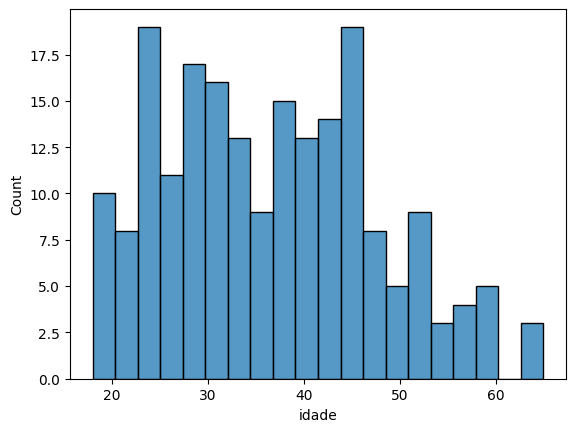

In [67]:
filtro = (df['estado'] == 'São Paulo') & (df['classe_trabalho'] == 'Funcionário Setor Privado')
dados_sp = df.loc[filtro]
sns.histplot(data=dados_sp, x='idade', bins=20)

Crie um gráfico de barras que represente a média salarial de todas as pessoas, agrupadas por raça. Em seguida, selecione a melhor representação gráfica.

       raca      salario
0   Amarelo  2309.410959
1    Branco  3187.203253
2  Indígena  3150.275000
3     Negro  2961.061538
4     Pardo  3601.735537


<Axes: xlabel='raca', ylabel='salario'>

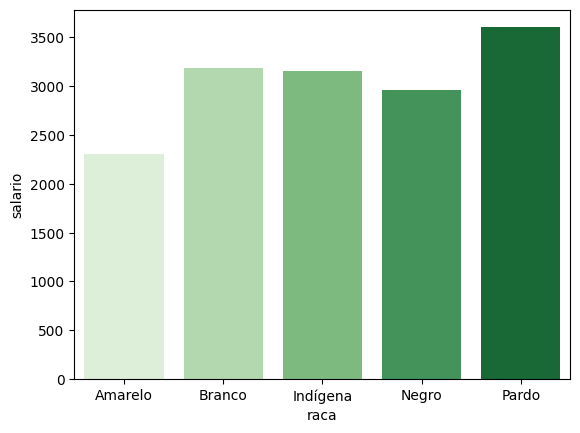

In [72]:
dados = df.groupby(['raca'])['salario'].mean().reset_index()
print(dados)
sns.barplot(data=dados, x='raca',
            y='salario',
            palette='Greens',
            hue='raca')

Crie um gráfico de barras para visualizar a distribuição do número de pessoas residentes em Minas Gerais, agrupadas por estado civil e raça. Em seguida, selecione a melhor representação gráfica.

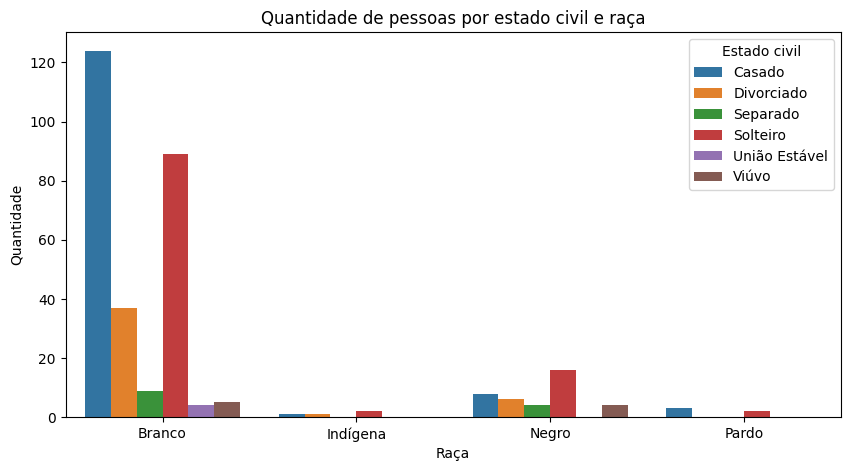

In [76]:
filtro = df['sigla'] == 'MG'

grouped = df.loc[filtro].groupby(['estado_civil', 'raca', 'sigla'])
dados = grouped.agg(
    qtde = ('escolaridade', 'count')
).reset_index()

plt.figure(figsize=(10,5))
sns.barplot(x='raca', y='qtde', hue='estado_civil', data=dados)
plt.title('Quantidade de pessoas por estado civil e raça')
plt.xlabel('Raça')
plt.ylabel('Quantidade')
plt.legend(title='Estado civil', loc='upper right')
plt.show()

Qual é a média e o desvio padrão do colesterol das pessoas que têm peso superior a 120 kg e residem na região Sul do Brasil?

In [87]:
filtro = (df['regiao'] == 'Sul') & (df['peso'] > 120)
dados = df.loc[filtro]
dados['colesterol'].describe().transpose()

TypeError: '>' not supported between instances of 'str' and 'int'